In [51]:
import pandas as pd
from scipy.stats import ttest_ind
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

**Reading in CSV and data carpentry**

*Reading Data: The code begins by reading investigation time data from two CSV files (df1 and df2).*

*Column Renaming: Column names in the DataFrames are adjusted for consistency and clarity.*

*Data Concatenation: The DataFrames are concatenated along the rows to combine the data from both files into a single DataFrame (combined_df).*

*Grouping by Social Agents: The investigation time data is grouped based on the 'Animal notes' column to separate data for cagemate and familiar social agents.*

*Also using a map to correct my spelling mistake from my CSV file.*

In [77]:
# Read the first CSV file
df1 = pd.read_csv(r"D:\Sequioa\anymaze_data\SM\cage_1_SM_day_1_3.csv")

# Read the second CSV file
df2 = pd.read_csv(r"D:\Sequioa\anymaze_data\SM\cage_2_SM_day_2_4.csv")

# Rename columns in the first DataFrame
df1.rename(columns={
    'Novel-Right : time investigating (s)': 'Novel',
    'Familiar-Left : time investigating (s)': 'Social Agent'
})

# Rename columns in the second DataFrame
df2.rename(columns={
    'Familiar Right : time investigating (s)': 'Social Agent',
    'Novel Left : time investigating (s)': 'Novel'
})

# Concatenate the DataFrames along the rows
combined_df = pd.concat([df1, df2])
combined_df['Animal notes'] = combined_df['Animal notes'].map({
    'cagemate': 'Cagemate',
    'familiar': 'Familiar',
    'cagmate': 'Cagemate'  # Add this line to fix the misspelling
})

combined_df

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Sequioa\\anymaze_data\\SM\\cage_1_SM_day_1_3.csv'

In [67]:
# Read the first CSV file
df1 = pd.read_csv(r"D:\Sequioa\anymaze_data\SM\cage_1_SM_day_1_3.csv")

# Read the second CSV file
df2 = pd.read_csv(r"D:\Sequioa\anymaze_data\SM\cage_2_SM_day_2_4.csv")

# Rename columns in the first DataFrame
df1.rename(columns={
    'Novel-Right : time investigating (s)': 'Novel',
    'Familiar-Left : time investigating (s)': 'Social Agent'}, 
    inplace=True)

# Rename columns in the second DataFrame
df2.rename(columns={
    'Familiar Right : time investigating (s)': 'Social Agent',
    'Novel Left : time investigating (s)': 'Novel'},
    inplace=True)

# Concatenate the DataFrames along the rows
combined_df = pd.concat([df1, df2], ignore_index=True)

# Map 'Animal notes' column values
animal_notes_mapping = {
    'cagemate': 'Cagemate',
    'familiar': 'Familiar',
    'cagmate': 'Cagemate'  # Fix misspelling
    }
combined_df['Animal notes'] = combined_df['Animal notes'].map(
    animal_notes_mapping)

# Display the combined DataFrame
combined_df

,Test,Animal,Animal notes,Segment of test,Novel,Social Agent,Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,1,1.1.1,Familiar,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6
1,2,1.3.1,Cagemate,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8
2,3,1.1.3,Cagemate,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5
3,4,1.2.3,Cagemate,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2
4,5,1.3.3,Familiar,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0
5,6,1.4.1,Cagemate,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8
6,7,1.2.1,Familiar,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1
7,8,1.4.3,Familiar,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2
8,1,2.1.2,Cagemate,0 - 300 secs.,48.1,22.0,265.8,101.5,118.4
9,2,2.4.2,Familiar,0 - 300 secs.,24.4,31.5,271.6,67.6,122.4


In [54]:
# Filter rows for cagemates
cagemate_df = combined_df[combined_df['Animal notes'] == 'Cagemate']

# Filter rows for familiar
familiar_df = combined_df[combined_df['Animal notes'] == 'Familiar']

**Summary Stats**

*The provided code calculates summary statistics for investigation time data. This analysis aims to provide key insights into the central tendency and dispersion of the investigation time measurements, allowing for a better understanding of the distribution of the data.*

In [68]:
# Original Code

# Calculate summary statistics
summary_stats = combined_df[['Novel', 'Social Agent']].describe()

# Calculate summary statistics for cagemates
cagemate_summary_stats = cagemate_df[cagemate_df['Animal notes'] == 'Cagemate'][['Novel', 'Social Agent']].describe()

# Calculate summary statistics for familiar
familiar_summary_stats = familiar_df[familiar_df['Animal notes'] == 'Familiar'][['Novel', 'Social Agent']].describe()

# Print summary statistics
print("Summary Statistics for Investigation Time:")
print(summary_stats)

print("Summary Statistics for Cagemate Social Agents:")
print(cagemate_summary_stats)

print("Summary Statistics for Familiar Social Agents:")
print(familiar_summary_stats)

Summary Statistics for Investigation Time:
            Novel  Social Agent
count   16.000000     16.000000
mean    63.750000     25.556250
std     29.440765     13.797486
min     22.500000      8.200000
25%     47.525000     16.925000
50%     56.650000     22.600000
75%     80.650000     29.400000
max    134.900000     59.200000
Summary Statistics for Cagemate Social Agents:
            Novel  Social Agent
count    8.000000      8.000000
mean    71.012500     23.200000
std     30.055113     16.147534
min     47.800000      8.200000
25%     52.150000     12.400000
50%     56.650000     21.600000
75%     82.675000     24.350000
max    134.900000     59.200000
Summary Statistics for Familiar Social Agents:
            Novel  Social Agent
count    8.000000      8.000000
mean    56.487500     27.912500
std     28.869927     11.597591
min     22.500000     13.400000
25%     36.400000     21.250000
50%     54.800000     26.200000
75%     70.300000     32.225000
max    106.400000     51.200000

In [69]:
# Improved Code 

# Calculate summary statistics for all columns
summary_stats = combined_df[['Novel', 'Social Agent']].agg(['count', 'mean', 'std'])

# Calculate summary statistics for cagemates
cagemate_summary_stats = cagemate_df[cagemate_df['Animal notes'] == 'Cagemate'][['Novel', 'Social Agent']].agg(['count', 'mean', 'std'])

# Calculate summary statistics for familiar
familiar_summary_stats = familiar_df[familiar_df['Animal notes'] == 'Familiar'][['Novel', 'Social Agent']].agg(['count', 'mean', 'std'])

# Print summary statistics
print("Summary Statistics for Investigation Time:")
print(summary_stats.loc[['count', 'mean', 'std']])

print("Summary Statistics for Cagemate Social Agents:")
print(cagemate_summary_stats.loc[['count', 'mean', 'std']])

print("Summary Statistics for Familiar Social Agents:")
print(familiar_summary_stats.loc[['count', 'mean', 'std']])


Summary Statistics for Investigation Time:
           Novel  Social Agent
count  16.000000     16.000000
mean   63.750000     25.556250
std    29.440765     13.797486
Summary Statistics for Cagemate Social Agents:
           Novel  Social Agent
count   8.000000      8.000000
mean   71.012500     23.200000
std    30.055113     16.147534
Summary Statistics for Familiar Social Agents:
           Novel  Social Agent
count   8.000000      8.000000
mean   56.487500     27.912500
std    28.869927     11.597591


**Independent Samples t-test:**

*I have two groups (e.g., Novel vs. Familiar Agents) and I want to compare the mean investigation time between them.*

In [70]:
# Extract the investigation time data for novel and social agent stimuli
novel_investigation_time = familiar_df['Novel']
familiar_agent_investigation_time = familiar_df['Social Agent']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(novel_investigation_time, familiar_agent_investigation_time)

# Print the results
print("Independent Samples T-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Independent Samples T-test Results:
T-statistic: 2.5977584222457586
P-value: 0.021069043605800832


In [71]:
#improved code 

# Perform independent samples t-test and print results
t_statistic, p_value = stats.ttest_ind(familiar_df['Novel'], familiar_df['Social Agent'])

# Print the results
print("Independent Samples T-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Independent Samples T-test Results:
T-statistic: 2.5977584222457586
P-value: 0.021069043605800832


In [59]:
# Calculate the mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = cagemate_df['Novel'].mean()
social_agent_mean = cagemate_df['Social Agent'].mean()

novel_sem = cagemate_df['Novel'].sem()
social_agent_sem = cagemate_df['Social Agent'].sem()


**plot mean investigation time of novel vs social agent** 

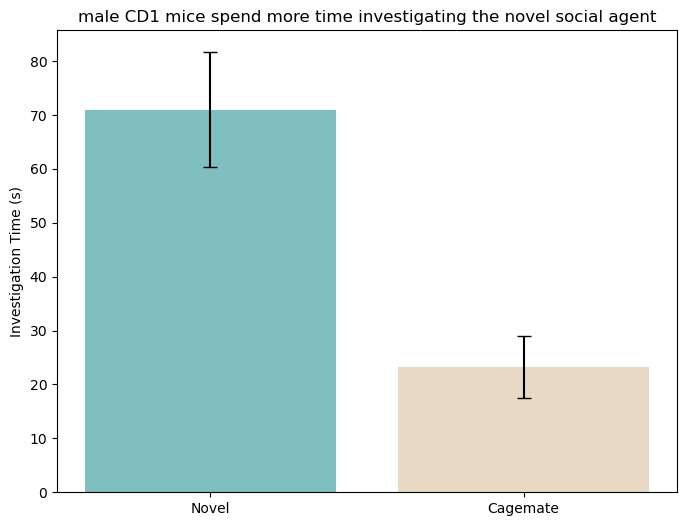

In [72]:
# Define x positions for the bars
x = np.arange(2)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(x, [novel_mean, social_agent_mean], color=['teal', 'tan'], alpha=0.5)

# Add error bars for SEM
plt.errorbar(
    x, [novel_mean, social_agent_mean],
    yerr=[novel_sem, social_agent_sem], 
    fmt='none', capsize=5, color='black')

# Add labels and title
plt.ylabel('Investigation Time (s)')
plt.title('male CD1 mice spend more time investigating the novel social agent')

# Set x-axis ticks
plt.xticks(x, ['Novel', 'Cagemate'])

# Remove grid lines
plt.grid(False)

# Show plot
plt.show()

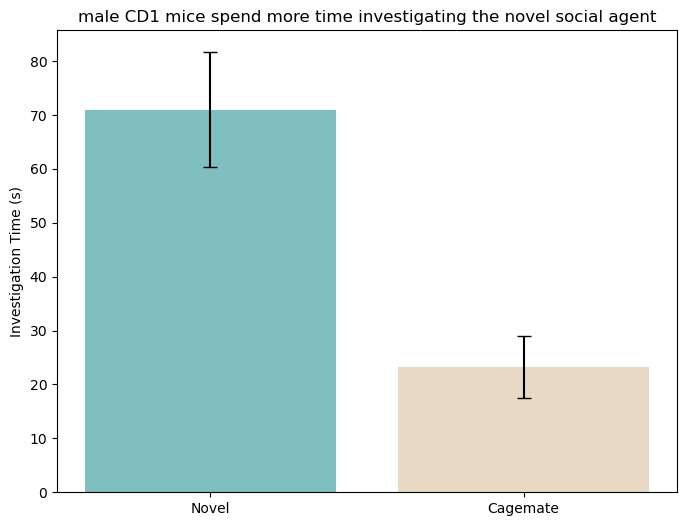

In [73]:
# Improved Code

# Define x positions for the bars
x = np.arange(2)

# Create a bar plot with error bars for SEM
plt.figure(figsize=(8, 6))
plt.bar(
    x, [novel_mean, social_agent_mean],
    yerr=[novel_sem, social_agent_sem], 
    color=['teal', 'tan'], alpha=0.5, capsize=5, ecolor='black')

# Add labels and title
plt.ylabel('Investigation Time (s)')
plt.title('male CD1 mice spend more time investigating the novel social agent')

# Set x-axis ticks and labels
plt.xticks(x, ['Novel', 'Cagemate'])

# Remove grid lines
plt.grid(False)

# Show plot
plt.show()

In [74]:
# Calculate summary statistics for cagemate
summary_stats_cagemate = cagemate_df[['Novel', 'Social Agent']].describe()

# Extract mean values for cagemate group
avg_novel_cagemate = summary_stats_cagemate.loc['mean', 'Novel']
avg_cagemate = summary_stats_cagemate.loc['mean', 'Social Agent']
sem_novel_cagemate = summary_stats_cagemate.loc['std', 'Novel'] / np.sqrt(len(cagemate_df))
sem_cagemate = summary_stats_cagemate.loc['std', 'Social Agent'] / np.sqrt(len(cagemate_df))

# Calculate summary statistics for familiar
summary_stats_familiar = familiar_df[['Novel', 'Social Agent']].describe()

# Extract mean values for familiar group
avg_novel_familiar = summary_stats_familiar.loc['mean', 'Novel']
avg_familiar = summary_stats_familiar.loc['mean', 'Social Agent']
sem_novel_familiar = summary_stats_familiar.loc['std', 'Novel'] / np.sqrt(len(familiar_df))
sem_familiar = summary_stats_familiar.loc['std', 'Social Agent'] / np.sqrt(len(familiar_df))

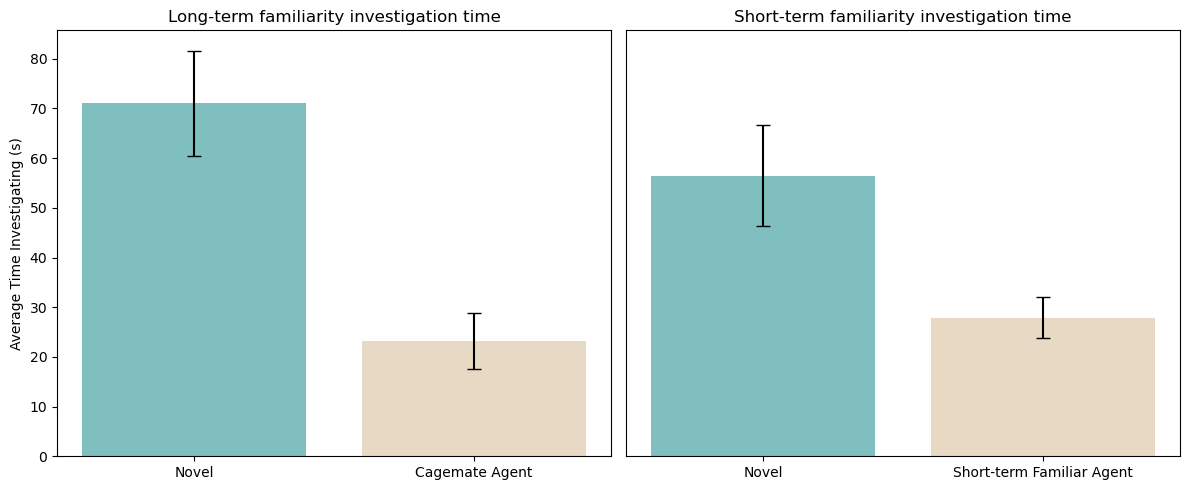

In [63]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for cagemate
axs[0].bar(['Novel', 'Cagemate Agent'], [avg_novel_cagemate, avg_cagemate],
            yerr=[sem_novel_cagemate, sem_cagemate], capsize=5, color=['teal', 'tan'], alpha=0.5)
axs[0].set_ylabel('Average Time Investigating (s)')
axs[0].set_title('Long-term familiarity investigation time')

# Plot for familiar
axs[1].bar(['Novel', 'Short-term Familiar Agent'], [avg_novel_familiar, avg_familiar],
            yerr=[sem_novel_familiar, sem_familiar], capsize=5, color=['teal', 'tan'], alpha=0.5)
axs[1].set_title('Short-term familiarity investigation time')
axs[1].tick_params(axis='y', which='both', left=False)  # Remove ticks from y-axis

# Show plot
plt.grid(False)  # Remove grid lines
plt.tight_layout()
plt.show()

**Discrimination index function**

*Numerator*

**row['Novel'] - row['Social Agent']**

*This subtracts the investigation time spent with the social agent stimulus from the investigation time spent with the novel stimulus.*

*If the value is positive, it means more time was spent with the novel stimulus compared to the social agent stimulus.*

*If the value is negative, it means more time was spent with the social agent stimulus compared to the novel stimulus.*

*If the value is zero, it means equal time was spent with both stimuli.*

*Denominator*

**row['Novel'] + row['Social Agent']**

*This adds the investigation time spent with both the novel and social agent stimuli.*

*This represents the total time spent investigating both stimuli.*

**Calculation**

*After subtracting the investigation time with the social agent from the investigation time with the novel stimulus, we divide this difference by the total investigation time spent with both stimuli.*

*This normalization step ensures that the discrimination index is a relative measure, taking into account the overall exploration time by the subject.*

*The discrimination index quantifies the preference or discrimination of the subject animal towards one stimulus over another, considering the total time spent exploring both stimuli.*

*A positive discrimination index indicates a preference for the novel stimulus, while a negative discrimination index indicates a preference for the social agent stimulus.*

In [64]:
# Define a function to calculate discrimination index
def calculate_discrimination_index(row):
    return (row['Novel'] - row['Social Agent']) / (row['Novel'] + row['Social Agent'])

# Apply the function to calculate discrimination index for each row
combined_df['Discrimination_Index'] = combined_df.apply(calculate_discrimination_index, axis=1)

# Print or display the DataFrame with Discrimination Index added
combined_df

,Test,Animal,Animal notes,Segment of test,Novel,Social Agent,Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s),Discrimination_Index
0,1,1.1.1,Familiar,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6,0.128511
1,2,1.3.1,Cagemate,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8,0.326291
2,3,1.1.3,Cagemate,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5,0.885395
3,4,1.2.3,Cagemate,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2,0.555340
4,5,1.3.3,Familiar,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0,0.648755
5,6,1.4.1,Cagemate,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8,0.746860
6,7,1.2.1,Familiar,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1,0.080214
7,8,1.4.3,Familiar,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2,0.653458
8,1,2.1.2,Cagemate,0 - 300 secs.,48.1,22.0,265.8,101.5,118.4,0.372325
9,2,2.4.2,Familiar,0 - 300 secs.,24.4,31.5,271.6,67.6,122.4,-0.127013


In [75]:
# Define a lambda function to calculate discrimination index
calculate_discrimination_index = lambda row: (row['Novel'] - row['Social Agent']) / (row['Novel'] + row['Social Agent'])

# Apply the lambda function to calculate discrimination index for each row
combined_df['Discrimination_Index'] = combined_df.apply(calculate_discrimination_index, axis=1)

# Print or display the DataFrame with Discrimination Index added
combined_df

## Improved Code 

# Improved function to calculate discrimination index
def calculate_discrimination_index(Novel_it, Social_Agent_it):
    """
    Calculate discrimination index based on Novel and Social Agent investigation times.
    
    Args:
    - Novel_it (float): Investigation time for the novel stimulus.
    - Social_Agent_it (float): Investigation time for the social agent stimulus.
    
    Returns:
    - float: Discrimination index value.
    """
    return (Novel_it - Social_Agent_it) / (Novel_it + Social_Agent_it)

# Apply the function to calculate discrimination index for each row using lambda function
combined_df['Discrimination_Index'] = combined_df.apply(
    lambda row: calculate_discrimination_index(row['Novel'], row['Social Agent']), axis=1)

# Display the DataFrame with Discrimination Index added
combined_df

,Test,Animal,Animal notes,Segment of test,Novel,Social Agent,Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s),Discrimination_Index
0,1,1.1.1,Familiar,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6,0.128511
1,2,1.3.1,Cagemate,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8,0.326291
2,3,1.1.3,Cagemate,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5,0.885395
3,4,1.2.3,Cagemate,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2,0.555340
4,5,1.3.3,Familiar,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0,0.648755
5,6,1.4.1,Cagemate,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8,0.746860
6,7,1.2.1,Familiar,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1,0.080214
7,8,1.4.3,Familiar,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2,0.653458
8,1,2.1.2,Cagemate,0 - 300 secs.,48.1,22.0,265.8,101.5,118.4,0.372325
9,2,2.4.2,Familiar,0 - 300 secs.,24.4,31.5,271.6,67.6,122.4,-0.127013
